In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Populating the interactive namespace from numpy and matplotlib


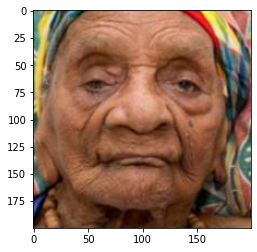

In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
img=mpimg.imread(r'/content/drive/My Drive/UTKFace/116_1_3_20170120134744096.jpg.chip.jpg')
imgplot = plt.imshow(img)
plt.show()

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob


In [4]:
img_width=48
img_height=48
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)
input_shape

(48, 48, 3)

In [5]:

# initial parameters
epochs = 100
lr = 1e-3
batch_size = 64

count =0
data = []
Age=[]
labels_x = []
# load image files from the dataset
image_files = [f for f in glob.glob(r'/content/drive/My Drive/UTKFace' + "/**", recursive=True) if not os.path.isdir(f)]
print("Images loaded ")
random.shuffle(image_files)
print("Images reshuffled ")



Images loaded 
Images reshuffled 


In [6]:
len(image_files)

23708

In [7]:
# converting images to arrays and labelling the categories
batch = 0
for img in image_files:

    image = cv2.imread(img)
    
    image = cv2.resize(image, (48,48))
    image = img_to_array(image)
    data.append(image)
    count = count +1
    batch = batch + 1
    if batch > 100:
      batch=0
      print("Images coverted to array ",count)
    if count > 20000:  #check for 10k images 
        break



Images coverted to array  101
Images coverted to array  202
Images coverted to array  303
Images coverted to array  404
Images coverted to array  505
Images coverted to array  606
Images coverted to array  707
Images coverted to array  808
Images coverted to array  909
Images coverted to array  1010
Images coverted to array  1111
Images coverted to array  1212
Images coverted to array  1313
Images coverted to array  1414
Images coverted to array  1515
Images coverted to array  1616
Images coverted to array  1717
Images coverted to array  1818
Images coverted to array  1919
Images coverted to array  2020
Images coverted to array  2121
Images coverted to array  2222
Images coverted to array  2323
Images coverted to array  2424
Images coverted to array  2525
Images coverted to array  2626
Images coverted to array  2727
Images coverted to array  2828
Images coverted to array  2929
Images coverted to array  3030
Images coverted to array  3131
Images coverted to array  3232
Images coverted t

In [8]:
image.shape

(48, 48, 3)

In [15]:
data

[array([[[ 15.,  31.,  54.],
         [ 19.,  36.,  62.],
         [ 15.,  33.,  62.],
         ...,
         [136., 140., 164.],
         [152., 174., 193.],
         [151., 172., 191.]],
 
        [[ 15.,  31.,  54.],
         [ 16.,  33.,  59.],
         [ 19.,  37.,  66.],
         ...,
         [129., 141., 157.],
         [160., 180., 197.],
         [159., 179., 197.]],
 
        [[ 19.,  35.,  58.],
         [ 17.,  34.,  60.],
         [ 17.,  35.,  64.],
         ...,
         [143., 161., 177.],
         [165., 181., 197.],
         [163., 179., 195.]],
 
        ...,
 
        [[157., 171., 209.],
         [147., 166., 199.],
         [148., 170., 206.],
         ...,
         [171., 183., 217.],
         [167., 185., 216.],
         [173., 190., 217.]],
 
        [[156., 174., 205.],
         [146., 168., 209.],
         [134., 161., 205.],
         ...,
         [164., 184., 215.],
         [163., 183., 214.],
         [166., 186., 217.]],
 
        [[159., 177., 208.],
 

In [16]:
labels_x=[]
Age=[]
count = 0

for imgname in image_files:
    Gender = imgname.split(os.path.sep)[-1].rsplit('_')[1]
   
    labels_x.append(Gender) #1 for male , 0 for female
    Age.append(imgname.split(os.path.sep)[-1].rsplit('_')[0])
    count = count +1
    if count > 20000:
        break


In [19]:
len(labels_x), len(data)

(20001, 20001)

In [80]:
# pre-processing

X = np.array(data)
X= X.astype('float32')
X /= 255
labels = to_categorical(labels_x, num_classes=2)

    



In [89]:
labels.shape

(20001, 2)


y_train=y_train.reshape(-1,)
y_test= y_test.reshape(-1,)

In [90]:

#Age = to_categorical(Age,num_classes=2)
# split dataset for training and validation
(X_train, X_test, y_train, y_test) = train_test_split(X, labels, test_size=0.2,
                                                  random_state=42)

# augmenting datset 
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


In [67]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model = Sequential()
model.add(Conv2D(64, (5, 5), input_shape=(48,48,3),activation='relu', padding='same'))#64 neurons with 5*5 filter
    #This class allows to create convolutional neural network to extract feature from the images
model.add(Conv2D(64, (5, 5), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(Conv2D(128, (5, 5),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(Conv2D(256, (3, 3),activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu')) #relu activation function added to remove the negative values
model.add(Dropout(0.2)) #Used to prevent a model from overfitting
model.add(Dense(2)) #output layer
model.add(Activation('softmax')) #softmax activation function
        



In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import cv2
import matplotlib.pyplot as plt
import os
import seaborn as sns
import umap
from PIL import Image
from scipy import misc
from os import listdir
from os.path import isfile, join
import numpy as np
from scipy import misc
from random import shuffle
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils.np_utils import to_categorical
os.listdir()
['__notebook__.ipynb']
os.chdir('../input/utkface-new/UTKFace/')
im =Image.open('1_0_0_20161219140623097.jpg.chip.jpg').resize((128,128))
im

onlyfiles = os.listdir()
len(onlyfiles)
23708
shuffle(onlyfiles)
gender = [i.split('_')[1] for i in onlyfiles]
I would like to make clear that the image data is in its name means the first box of the second cell, the second gender, the second one, so the first step is that we are trying to separate the labels from the images so that they are stored in the classes as much as we need them
We can split the data into Gender Classes - 0 Male 1 Female
classes = []
for i in gender:
    i = int(i)
    classes.append(i)
CONVERT IMAGES TO VECTORS

from PIL import Image
import PIL
import imageio
X_data =[]
for file in onlyfiles:
    face = imageio.imread(file)
    face = cv2.resize(face, (128,128) )
    X_data.append(face)
X = np.squeeze(X_data)
X.shape
(23708, 128, 128, 3)
# normalize data
X = X.astype('float32')
X /= 255
classes[:10]
[0, 1, 0, 1, 0, 0, 0, 0, 1, 1]
categorical_labels = to_categorical(classes, num_classes=2)
categorical_labels[:10]
array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.]], dtype=float32)
(x_train, y_train), (x_test, y_test) = (X[:15008],categorical_labels[:15008]) , (X[15008:] , categorical_labels[15008:])
(x_valid , y_valid) = (x_test[:7000], y_test[:7000])
(x_test, y_test) = (x_test[7000:], y_test[7000:])
len(x_train)+len(x_test) + len(x_valid) == len(X)
True
model = tf.keras.Sequential()

# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(128,128,3))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(2, activation='sigmoid'))

# Take a look at the model summary
model.summary()

In [91]:

model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [92]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 48, 48, 64)        4864      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_24 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_25 (Batc (None, 24, 24, 128)      

In [93]:

X_train.shape,y_train.shape,y_test.shape,X_test.shape

((16000, 48, 48, 3), (16000, 2), (4001, 2), (4001, 48, 48, 3))

In [94]:
y_train = y_train.reshape(16000,-1)
y_test = y_test.reshape(4001,-1)

In [95]:

X_train.shape,y_train.shape,y_test.shape,X_test.shape

((16000, 48, 48, 3), (16000, 2), (4001, 2), (4001, 48, 48, 3))

In [97]:
training = model.fit(X_train,y_train,batch_size=64,epochs=30, verbose=1)

Epoch 1/30
250/250 [==============================] - 8s 33ms/step - loss: 0.2719 - accuracy: 0.8775
Epoch 2/30
250/250 [==============================] - 8s 33ms/step - loss: 0.2386 - accuracy: 0.8981
Epoch 3/30
250/250 [==============================] - 8s 33ms/step - loss: 0.2159 - accuracy: 0.9077
Epoch 4/30
250/250 [==============================] - 8s 34ms/step - loss: 0.1952 - accuracy: 0.9193
Epoch 5/30
250/250 [==============================] - 8s 34ms/step - loss: 0.1701 - accuracy: 0.9303
Epoch 6/30
250/250 [==============================] - 8s 34ms/step - loss: 0.1479 - accuracy: 0.9388
Epoch 7/30
250/250 [==============================] - 8s 34ms/step - loss: 0.1239 - accuracy: 0.9499
Epoch 8/30
250/250 [==============================] - 8s 34ms/step - loss: 0.1090 - accuracy: 0.9569
Epoch 9/30
250/250 [==============================] - 8s 33ms/step - loss: 0.0827 - accuracy: 0.9693
Epoch 10/30
250/250 [==============================] - 8s 33ms/step - loss: 0.0768 - accura

In [98]:
y_pred=model.predict(X_test)


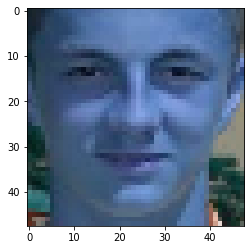

Masculine


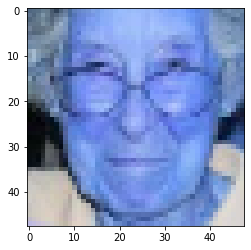

Masculine


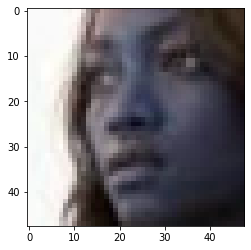

Feminine


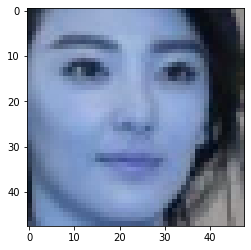

Feminine


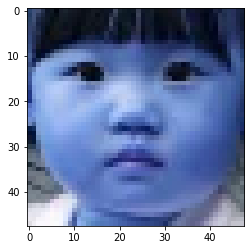

Feminine


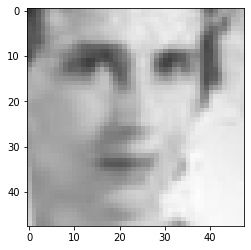

Feminine


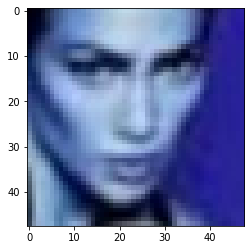

Masculine


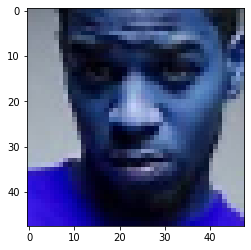

Masculine


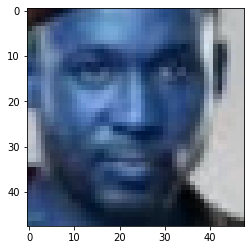

Masculine


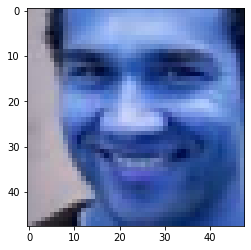

Masculine


In [99]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(X_test[i])
    plt.show()
    if (np.argmax(y_pred[i]) ==0):
        print('Masculine')
    else:
        print('Feminine')


In [100]:
from numpy import loadtxt
from keras.models import load_model
 
# Loading the Model
model = load_model('model_filter.h5')#Loding the pre-trained model file

# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 64)        1664      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 128)       409728    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 128)      

In [103]:
fer_json = model.to_json()
with open("fer.json", "w") as json_file:
    json_file.write(fer_json)


In [ ]:
#Save this code as file_name.py
#Save the fer.json file, model_filter.h5 file, and this code in the same folder
#Run it in your local system to recognize facial expression in real-time. 
#You can use Pycharm or Anaconda CLI to execute this section

import os
import cv2
import numpy as np
from keras.models import model_from_json
from keras.preprocessing import image

#load model
model = model_from_json(open("fer.json", "r").read())
#load weights
model.load_weights('model_filter.h5')


face_haar_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')


cap=cv2.VideoCapture(0)

while True:
    ret,test_img=cap.read()# captures frame and returns boolean value and captured image
    if not ret:
        continue
    gray_img= cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

    faces_detected = face_haar_cascade.detectMultiScale(gray_img, 1.32, 5)


    for (x,y,w,h) in faces_detected:
        cv2.rectangle(test_img,(x,y),(x+w,y+h),(255,0,0),thickness=7)
        roi_gray=gray_img[y:y+w,x:x+h]#cropping region of interest i.e. face area from  image
        roi_gray=cv2.resize(roi_gray,(48,48))
        img_pixels = image.img_to_array(roi_gray)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 255

        predictions = model.predict(img_pixels)

        #find max indexed array
        max_index = np.argmax(predictions[0])

        gender = ('Masculine', 'Feminine')
        predicted_gender = gender[max_index]

        cv2.putText(test_img, predicted_gender, (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    resized_img = cv2.resize(test_img, (1000, 700))
    cv2.imshow('Facial gender analysis ',resized_img)



    if cv2.waitKey(10) == ord('q'):#wait until 'q' key is pressed
        break

cap.release()
cv2.destroyAllWindows